In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import json
from bib.cleaning import *
from bib.rede import *
import matplotlib.pyplot as plt

In [3]:
contatos01 = pd.read_excel('./dados/last.xlsx',sheet_name='Contatos_01')
contatos02 = pd.read_excel('./dados/last.xlsx',sheet_name='Contatos_02')
data = pd.read_excel('./dados/last.xlsx',sheet_name='Pessoas')

In [4]:
degree = (data['#Contatos01'].values + data['#Contatos02'].values)/2
degree = np.array([i for i in degree if(i > 0)])
degree = np.ceil(degree).astype(int)
np.savetxt('./dados/degree.txt',degree,fmt = "%d")

In [7]:
visualize(degree,100)

0.5	9.72	8	6.56	0.458	-0.61	4.51	8.1


In [13]:
media,mediana,std,clustering,r,path,diametro = 0,0,0,0,0,0,0
T = 1
seed = 0
for i in range(T):
    deg = degree.copy()
    seed = i
    G = nx.configuration_model(deg,create_using = nx.Graph,seed = seed)
    a,b,c,d,e,f,g = calculate(G)
    media += a
    mediana += b
    std += c
    clustering += d
    r += e
    path += f
    diametro += g
    if(i%10 == 0):
        print(i)

media,mediana,std,clustering,r,path,diametro = media/T,mediana/T,std/T,clustering/T,r/T,path/T,diametro/T
print(media,mediana,std,clustering,r,path,diametro)

0
9.683587974371612 8.0 6.509986394634595 0.008762704360118624 -0.009293450802564041 3.519231984353113 7.0


In [16]:
degree = np.loadtxt("./degree.txt",dtype=int)
degree = degree[degree > 0]

In [13]:
visualize(degree,100)

0	9.72	8	6.56	0.0084	-0.0579	3.47	6


In [26]:
ER(degree,100)

10
20
30
40
50
60
70
80
90
100
9.72	9.89	3.11	0.00489	-0.000286	3.6	6.03


In [3]:
import os

In [5]:
files = ["./C/" + i for i in os.listdir("./C/") if('dados' in i)]

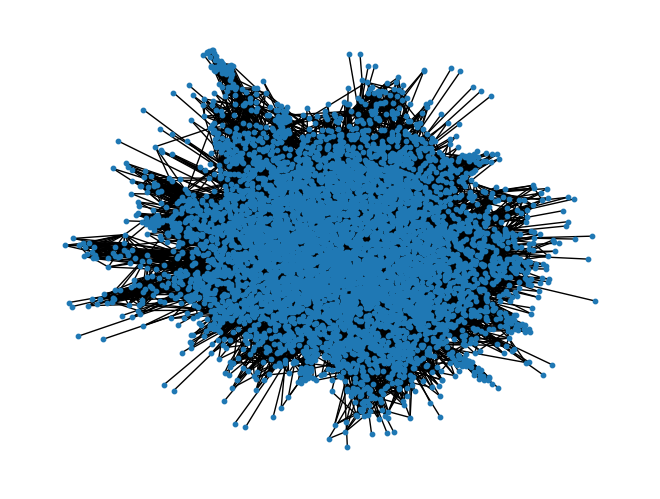

In [23]:
for file_ in files:
    rede = np.loadtxt(file_)
    G = nx.Graph()
    for i in rede:
        G.add_edge(i[0],i[1])
    nx.draw(G,node_size = 10,width = 1)
    plt.savefig(file_[:-3] + 'png')

In [19]:
files

['./C/dados_0.00.txt', './C/dados_1.00.txt', './C/dados_0.50.txt']

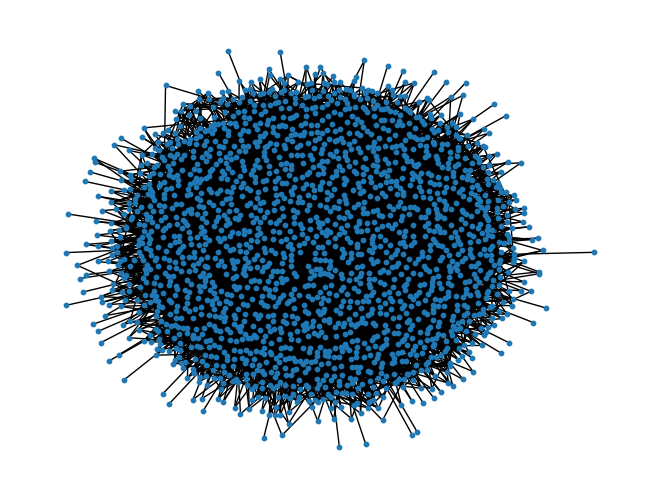

In [8]:
hist = [
    [0,0],
    [1,5],
    [6,19],
]
[hist.append([i,i+9]) for i in range(20,100,10)]
hist[-1] = [90,100000]

In [9]:
mortalidade = [mortalidade[i] for i in mortalidade]

In [10]:
def transform(i):
    if(i==1):
        return 2.5
    elif(i==2):
        return 10
    elif(i==3):
        return 75/2
    elif(i==4):
        return 90
    else:
        return 240
for site in contatos:
    for lig in contatos[site]:
        for k in hist:
            if(lig[3] in range(k[0],k[1]+1)):
                G.add_node(len(G.nodes)+1,weight = lig[3],mortalidade = mortalidade[hist.index(k)])
                break
        G.add_edge(site, len(G.nodes)+1, weight=transform(lig[-1]))
        #if(lig[-2]==1)

KeyboardInterrupt: 

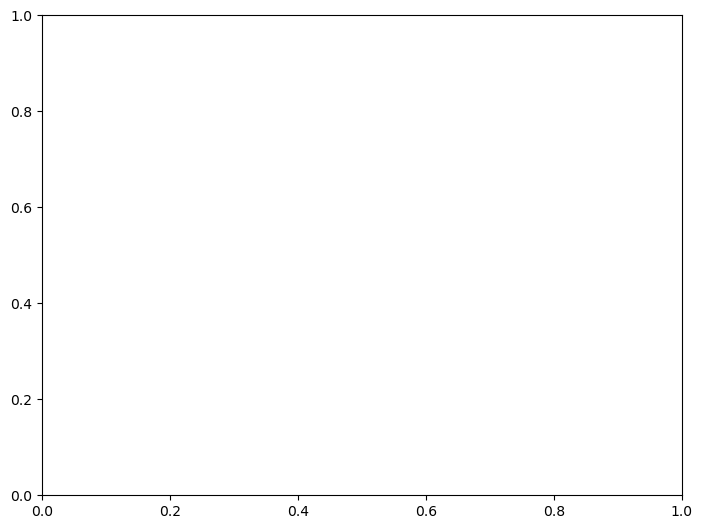

In [11]:
plt.figure()
nx.draw(G,node_size = 20)
plt.savefig("Rede.png")

In [6]:
graph = np.loadtxt('./C/resultado.txt').T

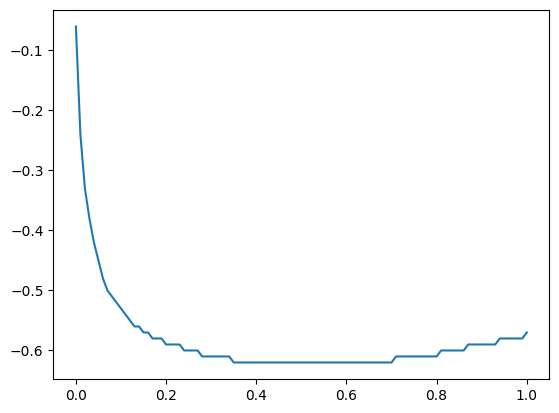

In [13]:
plt.plot(graph[0],graph[5])

In [13]:
len([e for e in G.edges])/(len(G.nodes)*(len(G.nodes)-1)/2)

0.000980392101851822

In [17]:
data1 = nx.node_link_data(G)
with open('./dados/rede.json', 'w') as f:
    json.dump(dict(data1), f)

TypeError: Object of type int64 is not JSON serializable

In [36]:
nx.write_gpickle(G,'./dados/Rede1.gpickle')

In [37]:
D1 = np.loadtxt('./dados/design1.txt',dtype = str)
D2 = np.loadtxt('./dados/design2.txt',dtype = str)

In [15]:
edges = combinations(D1, 2)

In [28]:
G = nx.Graph()
a = [(D1[i],D1[j]) for i in range(len(D1)) for j in range(i+1,len(D1[:])) ]
G.add_edges_from(a)

In [38]:
G = nx.Graph()
a = [(D2[i],D2[j]) for i in range(len(D2)) for j in range(i+1,len(D2[:])) ]
G.add_edges_from(a)

In [23]:
D1

array(['c10', '27', '28', '29', '30', '31', '32', '33', 'c11', '34', '35',
       '37', 'c12', 'c13', '38', '39', '40', 'c14', 'c15', '41', '42',
       '43', 'c16', '175', '241', 'c173', '242', '243', '244', '245',
       '246', '247', '248', '249', '250', '251', '252', '253', '254',
       '255', '256', '257', '258', '259', '260', '261', '262', '263',
       '264', '265', '266', '267', 'c174', '268', '269', '270', '271',
       '272', '273', '274', '275', '276', '277', '278', '279', '280',
       'c175', '281', 'c176', '282', 'c177', '283', 'c178', 'c179',
       'c180', '285', '286', '287', '288', '289', '290', '291', 'c182',
       '292', 'c183', 'c184', 'c185', 'c186', '293', 'c187', '294',
       'c188', 'c189', '295', '296', '297', 'c190', '298', '299', '300',
       '301', 'c191', '302', 'c192', '303', '304', '305', '306', 'c193',
       '307', '308', 'c194', 'c195', 'c196', '309', '310', '311', 'c197',
       'c198', '312', 'c199', '313', 'c200', 'c201', 'c202', 'c203',
      

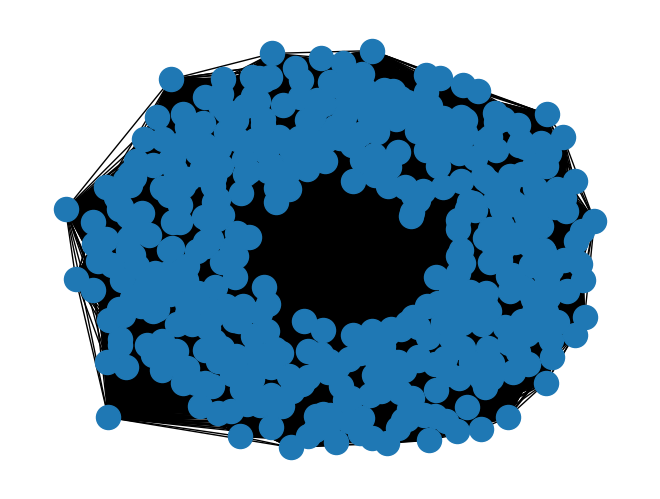

In [35]:
nx.draw_kamada_kawai(G)

In [39]:
nx.draw_kamada_kawai(G)

KeyboardInterrupt: 

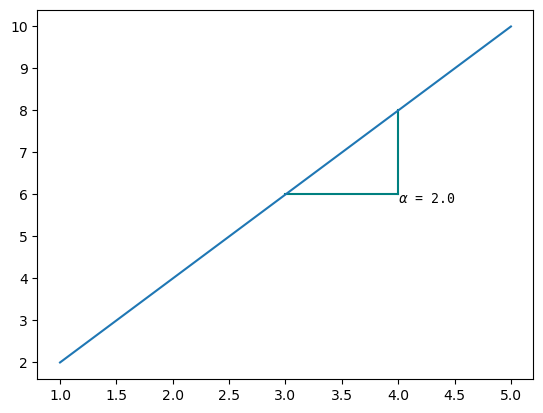

In [128]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

ax.plot([1,2,3,4,5],[2,4,6,8,10],zorder = 5)

def create_triangle(ponto1,ponto2,coef,ax,color,font = {'family': 'monospace','size': 9.5},c = 0.2):

    ax.plot([ponto1[0],ponto2[0]],[ponto1[1],ponto1[1]],c = color)
    ax.plot([ponto2[0],ponto2[0]],[ponto1[1],ponto2[1]],c = color)
    ax.text(ponto2[0],ponto1[1]-c,r"$\alpha$ = " + f"{coef}",fontdict= font,zorder = 0)

create_triangle([3,6],[4,8],2.0,ax,'teal')

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [7]:
df = pd.read_csv('./input/INFLUD20-14-11-2022.csv',delimiter = ';',usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','NM_MAE_PAC']) 

ValueError: Usecols do not match columns, columns expected but not found: ['NM_MAE_PAC']